<a href="https://colab.research.google.com/github/naufalHug0/house-price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


### Data cleaning

In [ ]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

### EDA

see how features correlated with House Price

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area
House age,1.000000,0.021596,0.021973,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.280763
House price of unit area,-0.012284,-0.636579,0.280763,1.000000


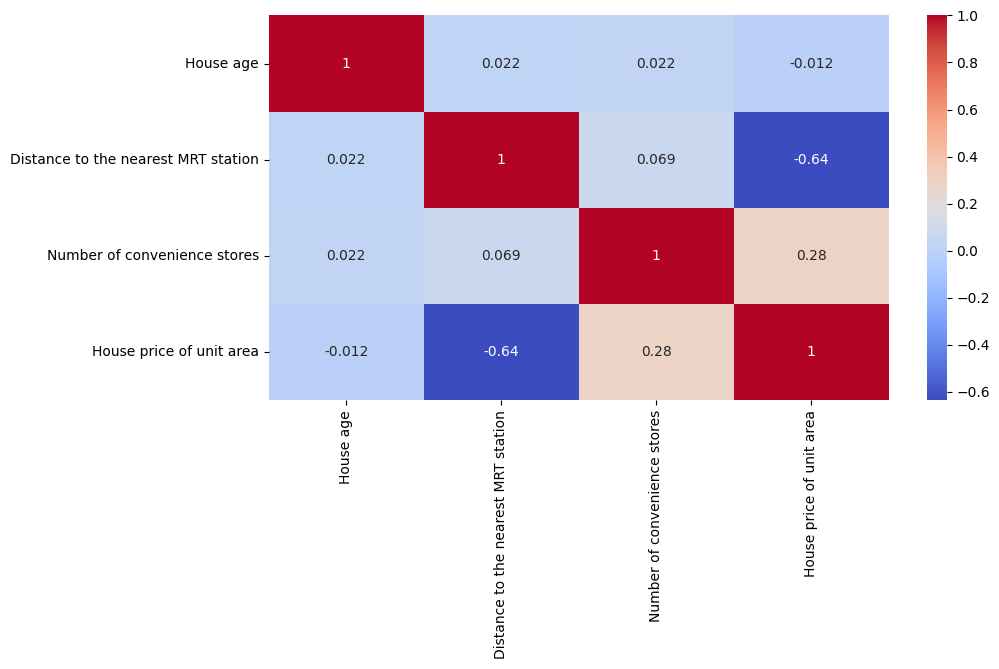

In [ ]:
df_selected = df[['House age','Distance to the nearest MRT station','Number of convenience stores','House price of unit area']]

plt.figure(figsize=(10,5))
c = df_selected.corr()
sns.heatmap(c,annot=True,cmap="coolwarm")
c

Areas with more convenience stores tend to have higher house prices

### Train Simple Model

**Determine the problem type :**
- **Regression**: If the target variable is continuous (e.g., price, temperature, age), it's a regression problem.

- **Classification**: If the target variable is categorical (e.g., yes/no, cat/dog, disease type), it's a classification problem.
- **Clustering**: If there is no target variable and you want to group similar data points together, it's a clustering problem.
- **Other Types**: There are specialized types like time series forecasting, anomaly detection, etc.

In [ ]:
features = ['House age','Distance to the nearest MRT station','Number of convenience stores']
target = 'House price of unit area'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size = 0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state controls the shuffling applied to the data before splitting

"""
X_train: The training set features (80% of X).
X_test: The testing set features (20% of X).
y_train: The training set targets (80% of y).
y_test: The testing set targets (20% of y).

Training Set: Used to train the model. The model learns the relationship between the input features (X_train) and the target variable (y_train).
Testing Set: Used to evaluate the model.
"""

#### Linear Regression model

In [ ]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#### Evaluate Model

In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.74198400400968


In [ ]:
df[target].max()

65.571716063673

it means that on average, the prediction error is around 14.8% (9.74 / 65.57)

- < 5% Error: excellent for most predictive models.
- 5-10% Error: Good and acceptable
- 10-15% Error: Fair, might be acceptable depending on the context and the complexity.
- "> 15%" Error: Often considered high, and there might be room for significant improvement.